Section 4: Task 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


(400, 600, 3)


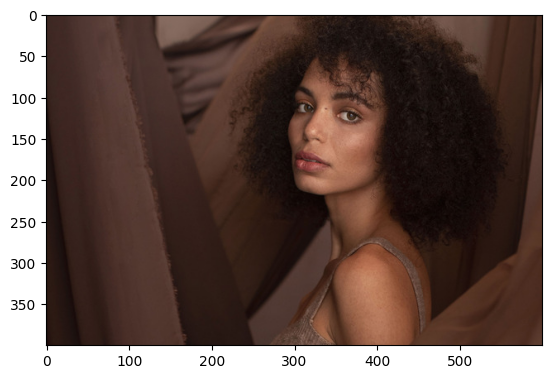

In [2]:
img = plt.imread('image.jpg')
print(img.shape)
plt.imshow(img)
plt.show() 

In [3]:
#Funtion to convert image to grayscale
def img_gray(img):
    return np.mean(img, axis=2)

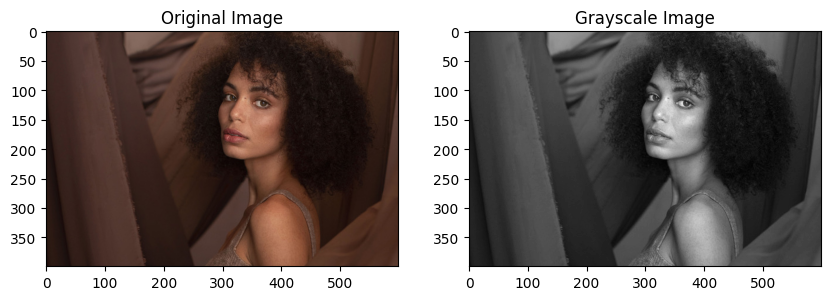

In [14]:
gray_img = img_gray(img)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(img )
ax[0].set_title('Original Image')

ax[1].imshow( gray_img, cmap='gray')
ax[1].set_title('Grayscale Image')

plt.show()

In [5]:
#Function to invert the image
def imcomplement(img):
    return 1 - img

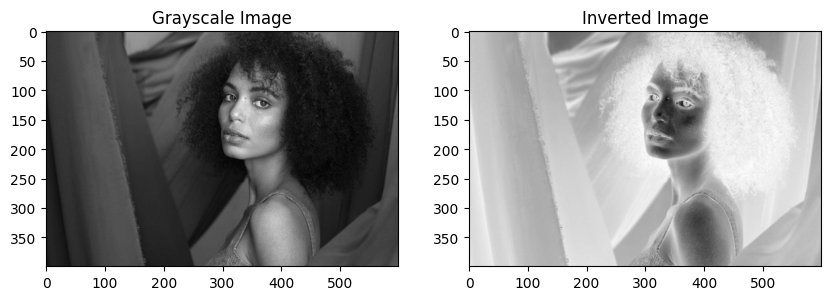

In [18]:
img_inv = imcomplement(gray_img)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(gray_img, cmap='gray')
ax[0].set_title('Grayscale Image')

ax[1].imshow( img_inv, cmap='gray')
ax[1].set_title('Inverted Image')

plt.show()

In [7]:
#Function to flip the image up down
def flipud(img):
    return np.flipud(img)

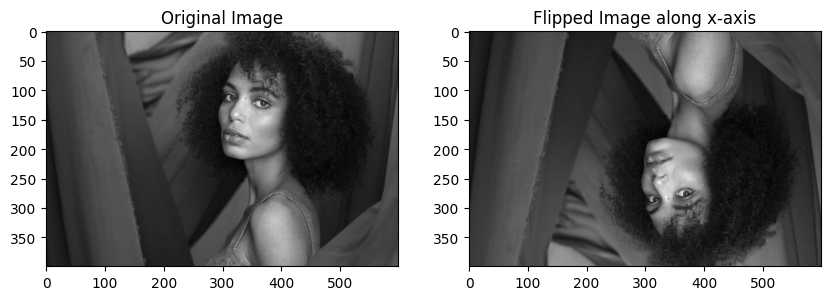

In [19]:
img_flipud = flipud(gray_img)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(gray_img, cmap='gray')
ax[0].set_title('Grayscale Image')

ax[1].imshow( img_flipud, cmap='gray')
ax[1].set_title('Flipped Image along x-axis')

plt.show()

In [9]:
#Function to flip the image left right
def fliplr(img):
    return np.fliplr(img)

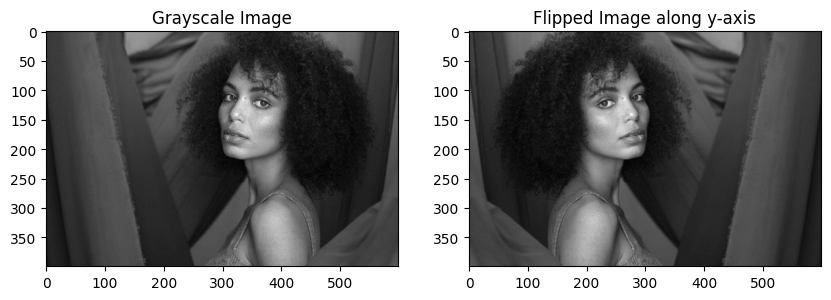

In [20]:
img_fliplr = fliplr(gray_img)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(gray_img, cmap='gray')
ax[0].set_title('Grayscale Image')

ax[1].imshow( img_fliplr, cmap='gray')
ax[1].set_title('Flipped Image along y-axis')

plt.show()

In [11]:
#Function to resize the image with nearest neighbor interpolation
def imresize(image, new_shape):
    x_new, y_new = new_shape
    x_old, y_old = image.shape
    
    # Calculate scaling factors
    scale_x = x_old / x_new
    scale_y = y_old / y_new
    
    # Initialize empty array for the resized image
    resized_image = np.empty((x_new, y_new), dtype=image.dtype)
    
    # Iterate over each pixel in the new image
    for i in range(x_new):
        for j in range(y_new):
            # Find the nearest pixel in the original image
            nearest_x = int(i * scale_x)
            nearest_y = int(j * scale_y)
            
            # Assign the pixel value from the original image to the resized image
            resized_image[i, j] = image[nearest_x, nearest_y]
    
    return resized_image

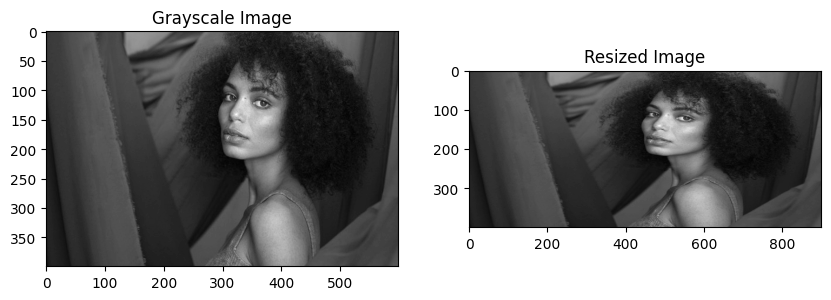

In [23]:
img_resize = imresize(gray_img, (400,900))
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(gray_img, cmap='gray')
ax[0].set_title('Grayscale Image')

ax[1].imshow( img_resize, cmap='gray')
ax[1].set_title('Resized Image')

plt.show()

Section 4: Task 2

In [24]:
import cv2

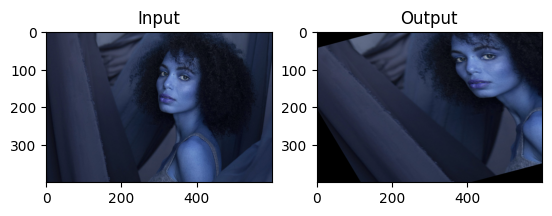

In [35]:
#Affine Transformation
img =cv2.imread('image.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

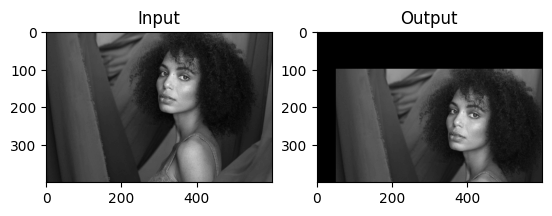

In [37]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

rows, cols = gray_img.shape

# Define the Translation Transformation
tx = 50
ty = 100
M = np.float32([[1, 0, tx], [0, 1, ty]])

# Perform the Transformation
dst = cv.warpAffine(gray_img, M, (cols, rows))

# Visualize the original and the transformed images
plt.subplot(121), plt.imshow(gray_img, cmap='gray'), plt.title('Input')
plt.subplot(122), plt.imshow(dst, cmap='gray'), plt.title('Output')
plt.show()

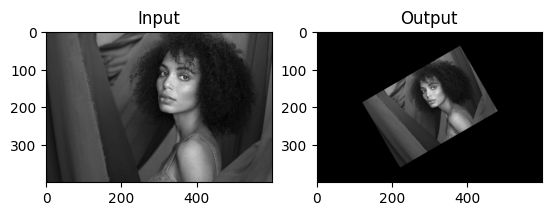

In [38]:
# Define the Similarity Transformation
scale_factor = 0.5
rotation_angle = 30
M = cv.getRotationMatrix2D((cols/2, rows/2), rotation_angle, scale_factor)

# Perform the Transformation
dst = cv.warpAffine(gray_img, M, (cols, rows))

# Visualize the original and the transformed images
plt.subplot(121), plt.imshow(gray_img, cmap='gray'), plt.title('Input')
plt.subplot(122), plt.imshow(dst, cmap='gray'), plt.title('Output')
plt.show()

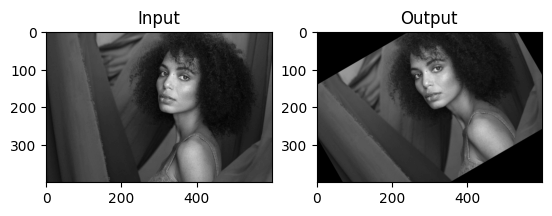

In [39]:
# Define the Euclidean Transformation
rotation_angle = 30
M = cv.getRotationMatrix2D((cols/2, rows/2), rotation_angle, 1)

# Perform the Transformation
dst = cv.warpAffine(gray_img, M, (cols, rows))

# Visualize the original and the transformed images
plt.subplot(121), plt.imshow(gray_img, cmap='gray'), plt.title('Input')
plt.subplot(122), plt.imshow(dst, cmap='gray'), plt.title('Output')
plt.show()

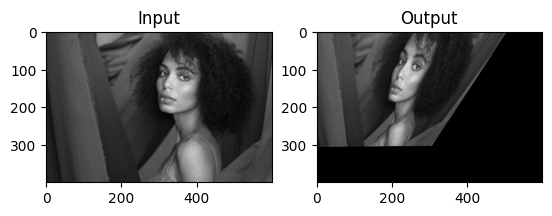

In [41]:
# Define the Projective Transformation
pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [200, 300]])
M = cv.getPerspectiveTransform(pts1, pts2)

# Perform the Transformation
dst = cv.warpPerspective(gray_img, M, (cols, rows))

# Visualize the original and the transformed images
plt.subplot(121), plt.imshow(gray_img, cmap='gray'), plt.title('Input')
plt.subplot(122), plt.imshow(dst, cmap='gray'), plt.title('Output')
plt.show()
